In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df.shape

(100, 4)

In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [10]:
import matplotlib.pyplot as plt


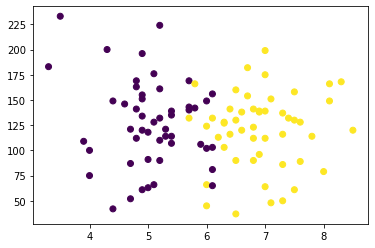

In [11]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [12]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [13]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
y.shape

(100,)

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [16]:
X_train

,cgpa,iq
66,6.9,96.0
95,4.3,200.0
26,7.0,199.0
81,5.4,107.0
9,5.1,66.0
...,...,...
51,4.8,141.0
47,5.2,161.0
20,6.6,120.0
85,5.8,166.0


In [17]:
y_train

66    1
95    0
26    1
81    0
9     0
     ..
51    0
47    0
20    1
85    1
45    1
Name: placement, Length: 90, dtype: int64

In [18]:
X_test

,cgpa,iq
40,4.9,134.0
13,6.4,116.0
60,6.9,139.0
44,7.5,61.0
19,5.2,132.0
54,6.4,141.0
79,6.5,90.0
24,4.7,121.0
57,6.5,130.0
16,5.2,224.0


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_train

array([[ 0.78538563, -0.67979914],
       [-1.4531069 ,  1.93868643],
       [ 0.87148149,  1.91350869],
       [-0.50605237, -0.40284393],
       [-0.76433997, -1.43513151],
       [ 2.16291949, -0.07553324],
       [-1.02262757, -0.2769552 ],
       [-0.9365317 ,  0.80568787],
       [-0.76433997,  0.12588873],
       [-0.85043584, -1.51066475],
       [ 0.87148149,  1.30924278],
       [ 0.09661869,  0.83086561],
       [-1.7113945 , -0.57908815],
       [ 0.26881043,  0.12588873],
       [ 1.30196082,  0.17624422],
       [-1.1948193 ,  0.57908815],
       [ 1.73244016, -1.10782082],
       [ 0.18271456, -0.25177746],
       [-0.24776477,  0.42802168],
       [-0.9365317 , -1.56102024],
       [ 0.09661869, -1.46030926],
       [ 1.81853602,  0.65462139],
       [ 0.09661869, -0.50355492],
       [-1.79749037, -0.35248844],
       [ 0.87148149,  0.40284393],
       [ 0.61319389,  0.78051012],
       [ 1.12976909, -0.17624422],
       [-1.02262757,  1.00710983],
       [ 1.38805669,

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[-0.9365317 ,  0.2769552 ],
       [ 0.35490629, -0.17624422],
       [ 0.78538563,  0.40284393],
       [ 1.30196082, -1.56102024],
       [-0.6782441 ,  0.22659971],
       [ 0.35490629,  0.45319943],
       [ 0.44100216, -0.83086561],
       [-1.10872343, -0.05035549],
       [ 0.44100216,  0.17624422],
       [-0.6782441 ,  2.54295233]])

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()

In [27]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = clf.predict(X_test)

In [29]:
y_test

40    0
13    1
60    1
44    1
19    0
54    1
79    1
24    0
57    1
16    0
Name: placement, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred)

1.0

In [35]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

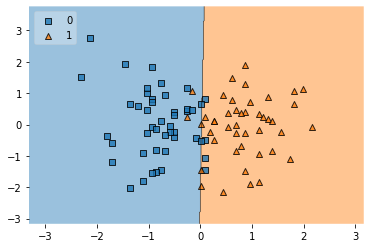

In [36]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [103]:
import pickle

In [104]:
pickle.dump(clf,open('model.pkl','wb'))

In [34]:
! pip install mlxtend

     |████████████████████████████████| 1.3 MB 552 kB/s eta 0:00:01


In [37]:
import pickle

In [39]:
pickle.dump(clf,open("model.pkl1","wb"))